# STAT 207 Project 03 - Two Predictors for NBA Rookie Points per Game

Bojun Cheng

<hr>

### Contribution Report

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

grade this submission

If you said **my submission is under netID** above, we will not grade any of your project submission.

If you said **grade this submission** above, who worked with you on this project?  Write both their **names** and **netIDs**.  

Bojun Cheng - bojunc3

You should list the contribution of each team member to the report.

*For example:*

*John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*

OR

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Group Work Reflection

Reflecting on your experience working as a group, how do you think the project went?  What were the most effective things your group did to work together?  What were the least effective things your group did to work together?  What have you learned about group work from the last project?  What might you change about your group's process or dynamics for the next project?  Did you face any substantial challenges in working together?  If so, please explain any challenges that you had.

*Note*: this can be completed individually or as a group, and each person can submit their own reflection to their own repository/submission or completely within the group submission.  If you would like your TA to read your individual reflection and yours is not the submission to be graded, be sure to email your TA.

## 1. Introduction

### Dataset
The following analysis uses the NBA rookies dataset collected for the course STAT 207 at UIUC. This dataset includes data collected on rookies in the NBA from 1980-2016 to determine if the rookies are successful and still playing in the NBA after 5 years.  The available variables include the following **per game** statistics:

- **GP**: number of games played
- **MIN**: number of minutes played per game
- **PTS**: number of points scored per game
- **FGM**: number of field goals made per game
- **FGA**: number of field goals attempted per game
- **FG_Perc**: percentage of field goals made per game
- **3P Made**: number of 3-point field goals made per game
- **3PA**: number of 3-point field goals attempted per game
- **3P_Perc**: percentage of 3-point field goals made per game
- **FTM**: number of free throws made per game
- **FTA**: number of free throws attempted per game
- **FT_Perc**: percentage of free throws made per game
- **OREB**: number of offensive rebounds per game
- **DREB**: number of defensive rebounds per game
- **REB**: total number of rebounds per game
- **AST**: number of assists per game
- **STL**: number of steals per game
- **BLK**: number of blocks per game
- **TOV**: number of turnovers per game
- **TARGET_5Yrs**: whether the player is still playing in the NBA after 5 years (1 = playing, 0 = not playing)

### Research Questions
Our research questions for the linear and logistic analyses are:

Linear: What is the relationship between minutes played per game and points scored per game after controlling for field goal percentage, free throw percentage, and assists both in the sample and in the underlying population? How does our model perform on new data?

Logistic: How do minutes played per game, free throw percentage, and field goal precentage relate to the log-odds of scoring above six points per game, on average? How does a classifier built on this model perform on new data?

For our linear regression analysis, we are interested in predicting the quantitative number of points scored per game, on average. For our logistic analysis, we are interested in predicting whether a rookie will score more than six points per game, on average.

### Importance
One popular area of sports betting is betting on how many points a player may score per game. Our logistic analysis produces a classifier which those interested can use to help inform who they may place bets on. Recruiters can also be interested in our results as they predict which players may see success in the future, which recruiters would want to take onto the teams they work for.

In [2]:
#Imports here
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

df = pd.read_csv('nba_rookie.csv')
df.head(5)
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_Perc', '3P Made', '3PA',
       '3P_Perc', 'FTM', 'FTA', 'FT_Perc', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [3]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=7)

## 2. Linear Regression Analytical Tasks

Our research question for the linear regression analysis is this: What is the relationship between minutes played per game and points scored per game after controlling for field goal percentage, free throw percentage, and assists both in the sample and in the underlying population? How does our model perform on new data?

In [4]:

linear = smf.ols('PTS ~ MIN + FG_Perc + FT_Perc + AST', data = df_train).fit()
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1333.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        02:57:18   Log-Likelihood:                -2077.6
No. Observations:                1047   AIC:                             4165.
Df Residuals:                    1042   BIC:                             4190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0266      0.596    -10.111      0.000      -7.196      -4.857
MIN            0.4642      0.009     51.008      0.000       0.446       0.482
FG_Perc        0.0603      0.010      5.994      0.000       0.041       0.080
FT_Perc        0.0291      0.006      5.280      0.000       0.018       0.040
AST           -0.0649      0.050     -1.300      0.194      -0.163       0.033
==============================================================================
Omnibus:                      156.849   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.434
Skew:                           0.675   Prob(JB):                    3.06e-130
Kurtosis:                       6.442   Cond. No.                         935.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our fitted model is y^ = -6.0266 + 0.4642*MIN + 0.0603\*FG_Perc + 0.0291\*FT_Perc - 0.0649\*AST.

Our explanatory variable of interest in this middle is MIN. The slope coefficient for this variable is 0.4642, meaning that we predict that for every 1 minute more that an NBA rookie between the years of 1980 and 2016 plays per game, they will score 0.4642 more points per game on average. The 95% confidence interval for the true population slope coefficient is (0.446, 0.482). 

We can check the linear regression conditions for our model using a fitted vs. residual plot for the linearity assumption and a correlation matrix to check for multicollinearity.

<Axes: xlabel='prediction', ylabel='residuals'>

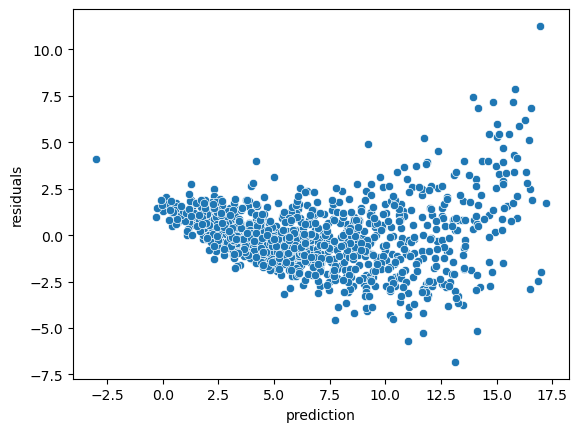

In [5]:
df_train['prediction'] = linear.predict(df_train)
df_train['residuals'] = df_train['PTS'] - df_train['prediction']
sns.scatterplot(data = df_train, x='prediction', y='residuals', )

From the residual vs. fitted plot, it seems that the bounding lines for the residuals are not parallel. This implies that there is a pattern in our errors, indicating that the assumption that there is a linear relationship between our explanatory variables and the predictor variable may not be true.

In [6]:
df_train[['FT_Perc', 'FG_Perc', 'AST', 'MIN']].corr()

,FT_Perc,FG_Perc,AST,MIN
FT_Perc,1.000000,-0.120728,0.290508,0.237480
FG_Perc,-0.120728,1.000000,-0.082904,0.232149
AST,0.290508,-0.082904,1.000000,0.626845
MIN,0.237480,0.232149,0.626845,1.000000


There is a high correlation between the assists per game and the minutes played per game. This indicates that we do have multicollinearity between these two variables, so for a better model we may want to remove one of them.

In [7]:
from sklearn.metrics import root_mean_squared_error

df_test['prediction'] = linear.predict(df_test)

test_RMSE = root_mean_squared_error(df_test['PTS'], df_test['prediction'])

print(f'test_RMSE = {test_RMSE}')

test_RMSE = 1.6671890044840576


In [8]:
df_test['PTS'].describe()

count    262.000000
mean       6.477099
std        4.223889
min        1.100000
25%        3.600000
50%        5.250000
75%        7.675000
max       24.300000
Name: PTS, dtype: float64

In [9]:
df_train['PTS'].describe()

count    1047.000000
mean        6.860840
std         4.355173
min         0.700000
25%         3.700000
50%         5.600000
75%         8.950000
max        28.200000
Name: PTS, dtype: float64

The R^2 value for our model is 0.837, indicating that it is a very strong model for predicting points per game for NBA rookies between 1980 and 2016. This value means that 83.7% of the variance in points per game can be explained by our chosen explanatory variables.

The RMSE on our test dataset is 1.6672. This is not very high given that the range of the actual points per game in the training data ranges from 1.1 to 24.3.

## 3. Logistic Regression Analytical Tasks

Our research question for the logistic regression analysis is this: How do minutes played per game, free throw percentage, and field goal precentage relate to the log-odds of scoring above six points per game, on average? How does a classifier built on this model perform on new data?

In [10]:
df_train['PTS_high'] = 1*(df_train['PTS'] > 6)

logistic = smf.logit('PTS_high ~ MIN + FT_Perc + FG_Perc', data = df_train).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: 0.228422
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               PTS_high   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Dec 2025   Pseudo R-squ.:                  0.6686
Time:                        02:57:18   Log-Likelihood:                -239.16
converged:                       True   LL-Null:                       -721.77
Covariance Type:            nonrobust   LLR p-value:                6.322e-209
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5295      1.876     -9.879      0.000     -22.206     -14.853
MIN            0.5226      0.036     14.524      0.000       0.452       0.593
FT_Perc        0.0617      0.014      4.500      0.000       0.035       0.089
FG_Perc        0.1088      0.023      4.815      0.000       0.064       0.153
==============================================================================
"""

Since the coefficients for each one of our explanatory variables are positive, we want higher values for minutes played per game, free throw percentage, and field goal percentage to have a higher chance of scoring greater than six points per game.

In [11]:
from sklearn.metrics import roc_auc_score

df_train['predictive_prob'] = logistic.predict(df_train)
auc = roc_auc_score(y_true=df_train['PTS_high'], 
                            y_score=df_train['predictive_prob'])
auc

0.9685089454449192

The pseudo-R^2 of our model is 0.6686, indicating that our model is relatively strong because it is relatively high.

The AUC is 0.9685089454449192, indicating that our model is extremely good because this score is close to the maximum of 1.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = '+str(round(auc, 3))+')')
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return (pd.DataFrame({'threshold':[thresh],
                          'fpr':[fpr],
                          'tpr':[tpr]}))

In [13]:
df_test['predictive_prob'] = logistic.predict(df_test)
df_test['PTS_high'] = 1*(df_test['PTS'] > 6)

df_test['classifier'] = 1*(df_test['predictive_prob'] > 0.5)

cfm = confusion_matrix(y_true = df_test['PTS_high'], y_pred = df_test['classifier'])
tn, fp, fn, tp = cfm.ravel()

accuracy = (tn + tp)/(tn + fp + fn + tp)
sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
print(f'''accuracy = {accuracy}
sensitivity = {sensitivity}
specificity = {specificity}''')

accuracy = 0.9045801526717557
sensitivity = 0.8653846153846154
specificity = 0.930379746835443


In [14]:
pd.crosstab(df_test['PTS_high'], df_test['classifier'])

classifier,0,1
PTS_high,,
0,147,11
1,14,90


For this scenario, we are someone interested in sports betting betting on the "under," that players will not score more than six points per game. In this scenario, we want to minimize false negatives because then we would place bets where we lose. 

For our classifier, the false negative rate out of predicted negatives is 14/(14+147) or 8.696%. This error rate is acceptable as it is less than 10%, but we also may want to lower it further since our money is at risk.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Any Other Type of Analysis / Question

### 4.1 Additional Analyses We Would Like to Explore 

If we had more time, we would be interested in exploring models that separate different types of scoring. For example, instead of only modeling total points per game, we could build separate models for 3-point scoring and free-throw scoring to see whether different skills predict success in different scoring areas. We would also consider adding interaction terms such as MIN × FG_Perc to examine whether the impact of shooting efficiency on points changes depending on playing time. Finally, we could compare our current models to tree-based methods (such as random forests) to see whether non-linear relationships between the variables provide any meaningful improvement in predictive performance.

In this section, we briefly illustrate one possible extension by adding an interaction term between minutes played and field goal percentage to our linear regression model.


In [ ]:
# explore an interaction term between MIN and FG_Perc 

# Create an interaction term
df_train['MIN_FG_interaction'] = df_train['MIN'] * df_train['FG_Perc']
df_test['MIN_FG_interaction'] = df_test['MIN'] * df_test['FG_Perc']

# Fit an extended linear regression model with the interaction term
linear_interaction = smf.ols(
    'PTS ~ MIN + FG_Perc + FT_Perc + AST + MIN_FG_interaction',
    data=df_train
).fit()

linear_interaction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1150.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        02:57:18   Log-Likelihood:                -2043.7
No. Observations:                1047   AIC:                             4099.
Df Residuals:                    1041   BIC:                             4129.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4767      0.970      0.492      0.623      -1.426       2.380
MIN                    0.0064      0.056      0.115      0.909      -0.103       0.115
FG_Perc               -0.0919      0.021     -4.445      0.000      -0.132      -0.051
FT_Perc                0.0317      0.005      5.931      0.000       0.021       0.042
AST                    0.0009      0.049      0.019      0.985      -0.095       0.097
MIN_FG_interaction     0.0101      0.001      8.346      0.000       0.008       0.013
==============================================================================
Omnibus:                       95.726   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.033
Skew:                           0.403   Prob(JB):                     9.68e-72
Kurtosis:                       5.617   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Compare test RMSE for the original model and the interaction model

df_test['pred_original'] = linear.predict(df_test)
df_test['pred_interaction'] = linear_interaction.predict(df_test)

rmse_original = root_mean_squared_error(df_test['PTS'], df_test['pred_original'])
rmse_interaction = root_mean_squared_error(df_test['PTS'], df_test['pred_interaction'])

print(f"Original model test RMSE:   {rmse_original:.4f}")
print(f"Interaction model test RMSE: {rmse_interaction:.4f}")


Original model test RMSE:   1.6672
Interaction model test RMSE: 1.6123


### 4.2 Interpretation of the Interaction Model 

We extended our linear regression model by adding an interaction term between minutes played per game and field goal percentage:

\[
{MIN\_FG\_interaction} = {MIN} * {FG\_Perc}.
\]

Using the test set, we compared the predictive performance of the original model and the interaction model:

- **Original model test RMSE:** 1.6672  
- **Interaction model test RMSE:** 1.6123  

Including the interaction term decreases the RMSE by about **0.055 points**, which is only a small improvement relative to the overall variability in rookie points per game (the standard deviation is over 4 points). This suggests that allowing the effect of minutes played to vary with field goal percentage does help the model fit the data slightly better, but the gain in predictive accuracy on new data is modest.

From a practical perspective, we would weigh this small improvement against the added complexity of the model. If our goal is interpretability and a simple story about how minutes, shooting percentages, and assists relate to scoring, the original additive model is likely sufficient. However, if we care about more predictive performance and are comfortable with a more complex model, then the interaction model could be justified.


## 5. Conclusion


### (a) Summarization

In this project we used both linear and logistic regression to study how rookie performance statistics relate to scoring in the NBA. Our linear regression model predicted points per game (PTS) using minutes played (MIN), field goal percentage (FG_Perc), free throw percentage (FT_Perc), and assists (AST). The model explained about 83.7% of the variability in rookie points per game (R² = 0.837), and the test RMSE was about 1.67 points, which is small relative to the overall range of scoring in the data. The coefficient for minutes played was positive and large, suggesting that, after controlling for shooting percentages and assists, additional playing time is strongly associated with higher scoring. Our logistic regression model predicted whether a rookie averaged more than six points per game based on MIN, FT_Perc, and FG_Perc. This classifier performed very well, with a pseudo R² of 0.6686, an AUC of about 0.97, and test accuracy around 0.90 (sensitivity ≈ 0.87, specificity ≈ 0.93), indicating that these three variables together are highly informative for distinguishing higher- and lower-scoring rookies.

### (b) Limitations

There are several limitations to our analysis and results. First, the residual vs. fitted plot for the linear model suggests some remaining pattern in the errors, so the linearity and constant-variance assumptions may not be fully satisfied. We also found relatively high correlation between minutes played and assists, indicating multicollinearity that can make individual coefficient interpretations less stable. For the logistic model, we chose a fixed cutoff of 6 points and a probability threshold of 0.5; different cutoffs or thresholds could change how well the model aligns with a bettor’s or recruiter’s real goals. Finally, our evaluation focuses on statistical metrics (RMSE, AUC, accuracy) rather than actual monetary outcomes or contract decisions. A sports bettor or recruiter using these results should therefore treat them as one piece of evidence rather than a complete decision rule.

### (c) Future work

Future work could extend this project in several directions. On the data side, we could include more predictors such as three-point statistics, usage rate, team pace, draft position, age, and position, and we could explicitly model differences across eras or teams. Methodologically, we could compare our linear and logistic models to more flexible approaches such as regularized regression (ridge or lasso), decision trees, random forests, or gradient boosting to see if they further reduce prediction error or improve classification performance. For the logistic task, we could explore alternative point cutoffs (e.g., 8 or 10 points per game), optimize the classification threshold based on expected profit or cost, and evaluate the model using profit-based metrics that are more meaningful for sports betting. We could also connect scoring to long-term success by combining points per game with the TARGET_5Yrs variable and using survival or longitudinal models. These extensions would help create a richer, more realistic tool for both bettors and recruiters interested in predicting rookie performance.


## AI Acknowledgement

Did you use AI on this assignment?  

If so, answer the following questions:
- Which AI did you use?
- What prompts did you ask it?
- How did you integrate the responses into your assignment?